In [1]:
import nltk
import numpy as np
import string
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')
from nltk.corpus import gutenberg
austen = gutenberg.sents('austen-sense.txt')+gutenberg.sents('austen-emma.txt')+gutenberg.sents('austen-persuasion.txt')

[nltk_data] Downloading package punkt to /home/nv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /home/nv/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print(len(austen))

16498


In [3]:
austen[:3]

[['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'],
 ['CHAPTER', '1'],
 ['The',
  'family',
  'of',
  'Dashwood',
  'had',
  'long',
  'been',
  'settled',
  'in',
  'Sussex',
  '.']]

In [4]:
from tensorflow.keras import preprocessing 
from nltk.corpus import stopwords 
import re
stop_words = set(stopwords.words('english')) 
nltk.download('stopwords')
normalized_corpus_temp = []
text = [token for alist in austen for token in alist ]
for tokenList in austen:
    normalisedTokenList = preprocessing.text.text_to_word_sequence(' '.join(tokenList), filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
    normalisedTokenList = [w for w in normalisedTokenList if not w in stop_words]
    normalisedTokenList = [w for w in normalisedTokenList if not w in string.punctuation]
    normalisedTokenList = [w for w in normalisedTokenList if not re.search(r'\d',w) ]
    
    normalized_corpus_temp.append(normalisedTokenList)
normalized_corpus = [' '.join(w) for w in normalized_corpus_temp if w and len(w) > 3]
normalized_corpus_tokens = [w for w in normalized_corpus_temp if w and len(w) > 3]

/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

In [5]:
len(normalized_corpus)

12498

In [6]:
normalized_corpus[10]

'therefore succession norland estate really important sisters fortune independent might arise father inheriting property could small'

In [7]:
import collections,random
word_counter = collections.Counter(' '.join(normalized_corpus).split())

In [8]:
len(word_counter.keys())

10038

In [9]:
word_ids = [k for k,v in word_counter.items()]
random.shuffle(word_ids)

In [10]:
word2idx = {}
word2idx = {token:id+2 for id,token in enumerate(word_ids)}
word2idx['<PAD>'] = 0
word2idx['<UNK>'] = 1

In [11]:
idx2word = {v: k for k,v in word2idx.items()}

In [12]:
sents_as_ids = []
    
for sent_token in normalized_corpus_tokens:
    temp=[]
    for token in sent_token:
        if token in word_ids:
            temp.append(word2idx[token])
        else:
            temp.append(word2idx['<UNK>']) 
    sents_as_ids.append(temp)

In [13]:
vocab_size = len(word_ids) + 1  # 1 was added for zero padding
embed_size = 100   # We are creating 100D embeddings.

In [14]:
print('Number of unique words:', len(word_ids))
word_ids[0:10]

Number of unique words: 10038


['reproaching',
 'stile',
 'associate',
 'lodged',
 'darings',
 'hair',
 'obligingly',
 'news',
 'dowager',
 'thunderbolt']

In [15]:
print('\nSample word2idx: ', list(word2idx.items())[:10])


Sample word2idx:  [('reproaching', 2), ('stile', 3), ('associate', 4), ('lodged', 5), ('darings', 6), ('hair', 7), ('obligingly', 8), ('news', 9), ('dowager', 10), ('thunderbolt', 11)]


In [16]:
print('\nSample idx2word:', list(idx2word.items())[:10])


Sample idx2word: [(2, 'reproaching'), (3, 'stile'), (4, 'associate'), (5, 'lodged'), (6, 'darings'), (7, 'hair'), (8, 'obligingly'), (9, 'news'), (10, 'dowager'), (11, 'thunderbolt')]


In [17]:
print('\nSample normalized corpus:', normalized_corpus[:3])


Sample normalized corpus: ['sense sensibility jane austen', 'family dashwood long settled sussex', 'estate large residence norland park centre property many generations lived respectable manner engage general good opinion surrounding acquaintance']


In [18]:
print('\nAbove sentence as a list of ids:' , sents_as_ids[:30])


Above sentence as a list of ids: [[2493, 8323, 890, 6469], [2284, 884, 1319, 2866, 7561], [1100, 9431, 250, 4650, 1285, 6816, 7863, 3560, 499, 9727, 623, 9719, 6084, 3843, 4064, 3829, 488, 373], [8562, 9228, 1100, 8454, 981, 9727, 6182, 7255, 3560, 3077, 8347, 5529, 586, 215, 795], [1252, 8279, 1570, 3077, 2634, 9043, 1004, 3025, 8128, 8625, 5409, 4105, 2245, 2284, 540, 6112, 2720, 884, 5058, 6025, 4650, 1100, 8452, 4858, 2001], [6991, 540, 2581, 1563, 6850, 5847, 1613, 1043, 72], [5529, 9086, 6112, 4798, 2720, 884, 5156, 3963, 7017, 2089, 334, 671, 5354, 8181, 1745, 7819, 6904, 7255, 5234, 7583, 2085, 1563, 5893, 261, 1944], [3571, 6645, 6112, 2720, 884, 3748, 9171, 7490, 4236, 3431, 5241], [9171, 990, 623, 2676, 981, 3941, 8327, 1919, 5108, 9431, 676, 5181, 1031, 7255], [6645, 6108, 8279, 6255, 5675, 5893, 3808], [1986, 6073, 4650, 1100, 2108, 649, 9381, 1919, 3681, 696, 3313, 4555, 860, 7863, 5234, 8553], [5108, 7588, 4555, 5344, 2506, 2640, 3641, 3664, 1734, 6931, 290, 1919, 4945,

In [19]:
from keras.preprocessing.sequence import skipgrams
skip_grams=[skipgrams(sent,vocabulary_size=vocab_size,window_size=5) for sent in sents_as_ids]

Using TensorFlow backend.


In [20]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(len(pairs)):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        # the first word and its index
        idx2word[pairs[i][0]], pairs[i][0],
        # the second word and its index
        idx2word[pairs[i][1]], pairs[i][1],
        # the label
        labels[i]))

(sense (2493), favourably (2433)) -> 0
(austen (6469), sensibility (8323)) -> 1
(sense (2493), alternative (4454)) -> 0
(sense (2493), jane (890)) -> 1
(jane (890), adoring (4981)) -> 0
(jane (890), disagreeableness (4167)) -> 0
(sense (2493), neatly (941)) -> 0
(austen (6469), prodigies (1598)) -> 0
(sensibility (8323), centered (7773)) -> 0
(sense (2493), sensibility (8323)) -> 1
(sensibility (8323), austen (6469)) -> 1
(sensibility (8323), jane (890)) -> 1
(jane (890), sense (2493)) -> 1
(sensibility (8323), familiar (3733)) -> 0
(jane (890), bonnet (9147)) -> 0
(austen (6469), fraternal (7324)) -> 0
(sensibility (8323), mum (3705)) -> 0
(austen (6469), jane (890)) -> 1
(jane (890), austen (6469)) -> 1
(austen (6469), sense (2493)) -> 1
(sensibility (8323), sense (2493)) -> 1
(jane (890), sensibility (8323)) -> 1
(sense (2493), austen (6469)) -> 1
(austen (6469), sealed (835)) -> 0


In [21]:
from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import plot_model
from tensorflow.keras import optimizers

In [22]:
target_word = Input((1,), dtype='int32')
target_embedding = Embedding(vocab_size,embed_size,name='target_embed_layer',embeddings_initializer='glorot_uniform',input_length=1)(target_word)
target_input = Reshape((embed_size,))(target_embedding)

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
context_word = Input((1,), dtype='int32')
context_embedding = Embedding(vocab_size,embed_size,name='context_embed_layer',embeddings_initializer='glorot_uniform',input_length=1)(context_word)
context_input = Reshape((embed_size,))(context_embedding)

In [24]:
merged_inputs = Dot(axes=-1, normalize=False)([target_input, context_input])

In [25]:
label = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(merged_inputs)

In [26]:
model=Model(inputs=[target_word,context_word],outputs=[label])

In [27]:
# Loss=‘mean_squared_error’,optimizer = ‘rmsprop’.
model.compile(optimizer='rmsprop',loss='mean_squared_error')

In [28]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
target_embed_layer (Embedding)  (None, 1, 100)       1003900     input_1[0][0]                    
__________________________________________________________________________________________________
context_embed_layer (Embedding) (None, 1, 100)       1003900     input_2[0][0]                    
__________________________________________________________________________________________________
reshape_1 

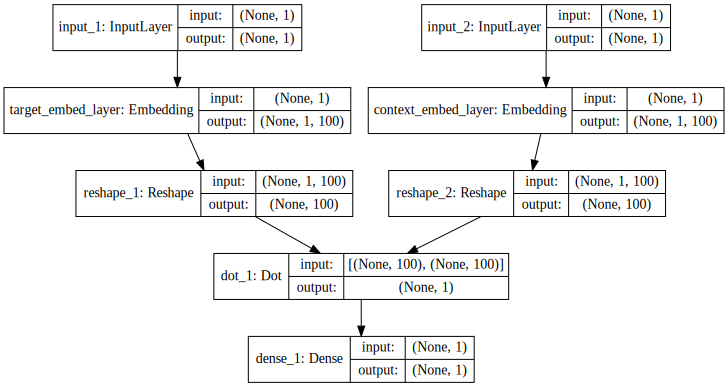

In [29]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

In [30]:
for epoch in range(1,6):
    epoch_loss = 0
    for i,sent_examples in enumerate(skip_grams):
        target_wds = np.array([pair[0] for pair in sent_examples[0]],dtype='int32')
        context_wds = np.array([pair[1] for pair in sent_examples[0]],dtype='int32')
        labels = np.array(sent_examples[1],dtype='int32')
        X = [target_wds,context_wds]
        Y = labels
        if i%5000 == 0:
            print('processed %d sentences' %i)
        epoch_loss += model.train_on_batch(X,Y)
    print('Processec all %d sentences' %i)
    print('Epoch:',epoch,'Loss:',epoch_loss,'\n')

processed 0 sentences
Instructions for updating:
Use tf.cast instead.
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 1 Loss: 2175.190807471052 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 2 Loss: 1777.6643357514404 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 3 Loss: 1701.5114387522917 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 4 Loss: 1660.9955589899328 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 5 Loss: 1641.8238103061449 



In [31]:
word_embeddings = model.get_layer('target_embed_layer').get_weights()[0][1:] # Recall that 0was left for padding

In [32]:
print(word_embeddings.shape)

(10038, 100)


In [37]:
import pandas as pd
pd.DataFrame(word_embeddings, index=list(idx2word.values())[2:]).head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
associate,-0.020045,-0.001763,0.016535,-0.003175,0.002000,0.012117,0.011768,0.018643,0.022655,-0.015000,...,-0.001846,-0.008644,-0.003889,-0.023789,0.023965,-0.020347,-0.002838,0.001289,0.018343,0.017297
lodged,-0.011502,-0.013534,0.007688,0.007331,-0.012501,0.005507,-0.018638,0.012154,0.028323,0.000536,...,-0.002149,0.022356,-0.005134,-0.017383,-0.021293,-0.022368,0.002379,0.012588,0.000249,-0.018521
darings,-0.021454,-0.008721,-0.019221,0.006020,-0.009952,0.007173,-0.028548,-0.018850,-0.011907,-0.024341,...,0.005108,0.033651,0.009149,-0.013178,-0.028106,-0.021036,0.019629,0.002787,-0.013306,-0.021206
hair,0.006446,-0.007346,0.013194,-0.011496,0.020060,-0.009993,0.000003,-0.019468,0.006430,-0.009254,...,-0.013349,0.013188,-0.009857,0.005631,0.007394,0.004340,0.013096,0.008186,0.016919,-0.025155
obligingly,-0.012690,0.017057,-0.006539,0.017323,0.003551,0.000967,0.017196,-0.012516,0.010532,0.008085,...,-0.012575,0.006714,-0.004461,-0.012357,-0.029997,0.014858,0.008793,-0.008614,-0.000711,0.000999
news,0.010553,-0.006085,-0.024651,0.013164,-0.018086,-0.003133,-0.018105,-0.007672,0.008750,-0.001008,...,-0.022329,0.024261,0.020816,-0.013305,0.014875,-0.005669,0.005019,-0.006773,0.011401,0.012212
dowager,-0.004592,-0.038555,0.005749,0.010398,-0.000224,-0.043308,0.033031,0.012996,0.005726,0.011796,...,0.059280,0.039796,0.012714,0.012364,-0.016442,0.010909,-0.013742,0.007409,0.035789,-0.020307
thunderbolt,-0.024162,-0.028190,-0.022987,0.004669,0.010412,-0.029003,0.021878,0.015911,-0.001880,-0.018695,...,-0.007800,0.025498,0.021908,0.016312,0.005331,0.016152,-0.018840,0.017649,0.020949,0.012666
worked,0.008922,0.011492,-0.010323,-0.043553,-0.008437,-0.017712,0.021775,0.059808,-0.002090,-0.005783,...,0.031426,-0.008801,0.003642,0.036072,-0.011250,-0.001391,-0.032551,0.000666,0.006626,0.006104
hot,-0.024068,0.004079,-0.026159,-0.024993,0.020006,0.016663,0.023872,0.009441,0.005688,0.000390,...,0.010868,0.013765,-0.020443,0.009221,0.000599,0.013203,0.018071,-0.019516,0.001830,-0.017500


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(word_embeddings)

In [39]:
print(similarity_matrix.shape)

(10038, 10038)


In [47]:
search_terms = ['<UNK>','man', 'love', 'hatred', 'woman', 'wisdom',  'kindness', 'god', 'man', 'folly', 'fool']

In [48]:
similar_words = {term: [idx2word[idx]
                        for idx in (-1 * similarity_matrix[word2idx[term]-1]).argsort()[1:6] + 1]
                        for term in search_terms}

In [49]:
print(similar_words)

{'<UNK>': ['upwards', 'failure', 'agitation', 'cattle', 'pembroke'], 'man': ['lively', 'mortgage', 'readily', 'woman', 'retrenching'], 'love': ['wanted', 'saving', 'consistency', 'heels', 'feared'], 'hatred': ['befall', 'scholar', 'taken', 'faculties', 'retire'], 'woman': ['secured', 'manners', 'suit', 'would', 'man'], 'wisdom': ['harbour', 'watching', 'discompose', 'prepossessed', 'pretends'], 'kindness': ['exit', 'deal', 'prepared', 'marriages', 'recalled'], 'god': ['henceforth', 'unmirthful', 'securing', 'appreciating', 'accord'], 'folly': ['help', 'ecstasy', 'complimenter', 'farthing', 'accommodate'], 'fool': ['uniting', 'curl', 'campbells', 'footman', 'impartial']}


In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

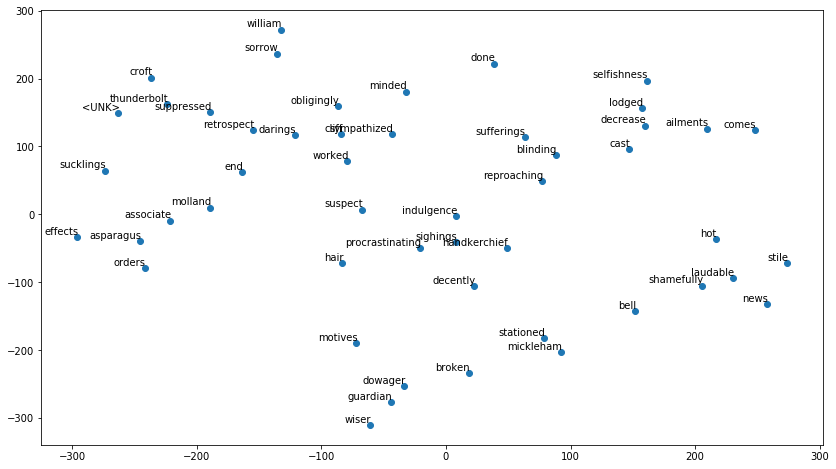

In [46]:
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50
T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')